In [28]:
#Librerias
import matplotlib.pyplot as plt
import pandas as pd
import os

In [24]:
df24 = pd.read_csv(os.path.join("Datos_rendimiento", "20250212_Rendimiento_2024_20250131_WEB.csv"), encoding="utf-8", sep=";")
df23 = pd.read_csv(os.path.join("Datos_rendimiento", "20240209_Rendimiento_2023_20240131_WEB.csv"), encoding="utf-8", sep=";")
df22 = pd.read_csv(os.path.join("Datos_rendimiento", "20230209_Rendimiento_2022_20230131_WEB.csv"), encoding="utf-8", sep=";")
df21 = pd.read_csv(os.path.join("Datos_rendimiento", "20220302_Rendimiento_2021_20220131_WEB.csv"), encoding="utf-8", sep=";")
df20 = pd.read_csv(os.path.join("Datos_rendimiento", "20210223_Rendimiento_2020_20210131_WEB.csv"), encoding="utf-8", sep=";")
df19 = pd.read_csv(os.path.join("Datos_rendimiento", "20200220_Rendimiento_2019_20200131_PUBL.csv"), encoding="utf-8", sep=";")
df18 = pd.read_csv(os.path.join("Datos_rendimiento", "20190220_Rendimiento_2018_20190131_PUBL.csv"), encoding="utf-8", sep=";")
df17 = pd.read_csv(os.path.join("Datos_rendimiento", "20180213_Rendimiento_2017_20180131_PUBL.csv"), encoding="utf-8", sep=";")

C:\Users\gaspa\AppData\Local\Temp\ipykernel_3888\761986139.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df24 = pd.read_csv(os.path.join("Datos_rendimiento", "20250212_Rendimiento_2024_20250131_WEB.csv"), encoding="utf-8", sep=";")
C:\Users\gaspa\AppData\Local\Temp\ipykernel_3888\761986139.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df23 = pd.read_csv(os.path.join("Datos_rendimiento", "20240209_Rendimiento_2023_20240131_WEB.csv"), encoding="utf-8", sep=";")
C:\Users\gaspa\AppData\Local\Temp\ipykernel_3888\761986139.py:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df22 = pd.read_csv(os.path.join("Datos_rendimiento", "20230209_Rendimiento_2022_20230131_WEB.csv"), encoding="utf-8", sep=";")
C:\Users\gaspa\AppData\Local\Temp\ipykernel_3888\761986139.py:4: DtypeWarning: Columns (25) have mixed types. Speci

In [25]:
df24["PROM_GRAL"] = df24["PROM_GRAL"].str.replace(",", ".", regex=False).str.strip().astype("float")
df24_limpio = df24[df24["PROM_GRAL"] != 0]
df24_e_media = df24_limpio[df24["COD_ENSE2"] == 5]

df23["PROM_GRAL"] = df23["PROM_GRAL"].str.replace(",", ".", regex=False).str.strip().astype("float")
df23_limpio = df23[df23["PROM_GRAL"] != 0]
df23_e_media = df23_limpio[df23["COD_ENSE2"] == 5]

df22["PROM_GRAL"] = df22["PROM_GRAL"].str.replace(",", ".", regex=False).str.strip().astype("float")
df22_limpio = df22[df22["PROM_GRAL"] != 0]
df22_e_media = df22_limpio[df22["COD_ENSE2"] == 5]

df21["PROM_GRAL"] = df21["PROM_GRAL"].str.replace(",", ".", regex=False).str.strip().astype("float")
df21_limpio = df21[df21["PROM_GRAL"] != 0]
df21_e_media = df21_limpio[df21["COD_ENSE2"] == 5]

df20["PROM_GRAL"] = df20["PROM_GRAL"].str.replace(",", ".", regex=False).str.strip().astype("float")
df20_limpio = df20[df20["PROM_GRAL"] != 0]
df20_e_media = df20_limpio[df20["COD_ENSE2"] == 5]

df19["PROM_GRAL"] = df19["PROM_GRAL"].str.replace(",", ".", regex=False).str.strip().astype("float")
df19_limpio = df19[df19["PROM_GRAL"] != 0]
df19_e_media = df19_limpio[df19["COD_ENSE2"] == 5]

df18["PROM_GRAL"] = df18["PROM_GRAL"].str.replace(",", ".", regex=False).str.strip().astype("float")
df18_limpio = df18[df18["PROM_GRAL"] != 0]
df18_e_media = df18_limpio[df18["COD_ENSE2"] == 5]

df17["prom_gral"] = df17["prom_gral"].str.replace(",", ".", regex=False).str.strip().astype("float")
df17_limpio = df17[df17["prom_gral"] != 0]
df17_e_media = df17_limpio[df17["cod_ense2"] == 5]


C:\Users\gaspa\AppData\Local\Temp\ipykernel_3888\2555509972.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df24_e_media = df24_limpio[df24["COD_ENSE2"] == 5]
C:\Users\gaspa\AppData\Local\Temp\ipykernel_3888\2555509972.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df23_e_media = df23_limpio[df23["COD_ENSE2"] == 5]
C:\Users\gaspa\AppData\Local\Temp\ipykernel_3888\2555509972.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df22_e_media = df22_limpio[df22["COD_ENSE2"] == 5]
C:\Users\gaspa\AppData\Local\Temp\ipykernel_3888\2555509972.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df21_e_media = df21_limpio[df21["COD_ENSE2"] == 5]
C:\Users\gaspa\AppData\Local\Temp\ipykernel_3888\2555509972.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df20_e_media = df20_limpio[df20["COD_ENSE2"] == 5]
C:\Users\gaspa\AppData

In [34]:
pr24 = round(df24_e_media["PROM_GRAL"].mean(), 2)
pr23 = round(df23_e_media["PROM_GRAL"].mean(), 2)
pr22 = round(df22_e_media["PROM_GRAL"].mean(), 2)
pr21 = round(df21_e_media["PROM_GRAL"].mean(), 2)
pr20 = round(df20_e_media["PROM_GRAL"].mean(), 2)
pr19 = round(df19_e_media["PROM_GRAL"].mean(), 2)
pr18 = round(df18_e_media["PROM_GRAL"].mean(), 2)
pr17 = round(df17_e_media["prom_gral"].mean(), 2)


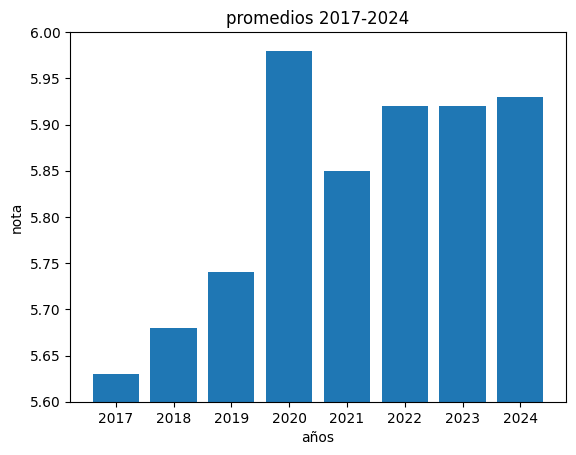

In [ ]:
años = ['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
promedios = [pr17, pr18, pr19, pr20, pr21, pr22, pr23, pr24]

plt.bar(años, promedios)

plt.title("promedio general educación media 2017-2024")
plt.xlabel("años")
plt.ylabel("nota")
plt.ylim((5.6), 6)

plt.show()